In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# set numpy seed
np.random.seed(5)

In [2]:
l = 3       # lambda: parametro dell'esponenziale
t = 4       # threshold

In [3]:
N_min = 100
N_max = 100000
N = np.arange(N_min, N_max, 100)

sample = np.random.exponential(l, N_max)

estimates = []
cen_estimates = []

for i in tqdm(N):
    estimates.append(np.mean(sample[:i]))
    censored_sample = np.where(sample[:i] > t, 1, 0)
    cen_estimates.append(1/(-np.log(np.mean(censored_sample))/t))

  0%|          | 0/999 [00:00<?, ?it/s]

100%|██████████| 999/999 [00:00<00:00, 3013.13it/s]


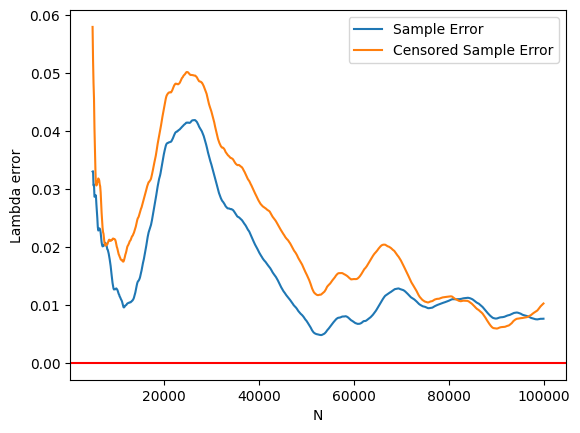

In [4]:
df = pd.DataFrame({'N': N, 'estimates': estimates, 'cen_estimates': cen_estimates})
df['estimate_error'] = np.abs(df['estimates'] - l)
df['cen_estimate_error'] = np.abs(df['cen_estimates'] - l)
df['SMA_estimates_error'] = df['estimate_error'].rolling(50).mean()
df['SMA_cen_estimates_error'] = df['cen_estimate_error'].rolling(50).mean()

plt.plot(df['N'], df['SMA_estimates_error'], label='Sample Error')
plt.plot(df['N'], df['SMA_cen_estimates_error'], label='Censored Sample Error')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('N')
plt.ylabel('Lambda error')
plt.legend()